In [33]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.datasets import load_boston


In [2]:
data = pd.read_csv('final_with_covid_AS.csv')


# Car Driver

In [3]:
filtered_data = data[data['CarDriver'] == 1]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12582 entries, 11 to 54025
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       12582 non-null  int64  
 1   BedDys           12582 non-null  int64  
 2   BeddystoCC       12582 non-null  float64
 3   Severity         12582 non-null  int64  
 4   DiedCases        12582 non-null  int64  
 5   DiedBdDys        12582 non-null  int64  
 6   Hsptlsns         12582 non-null  int64  
 7   April            12582 non-null  int64  
 8   August           12582 non-null  int64  
 9   December         12582 non-null  int64  
 10  February         12582 non-null  int64  
 11  January          12582 non-null  int64  
 12  July             12582 non-null  int64  
 13  June             12582 non-null  int64  
 14  March            12582 non-null  int64  
 15  May              12582 non-null  int64  
 16  November         12582 non-null  int64  
 17  October    

In [4]:
target = filtered_data['Severity'].shift(-1)

In [5]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import xgboost as xgb


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd



X = filtered_data[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=45)
params = {
    
}

# آموزش مدل XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی بر روی داده‌های آزمون
y_pred = xgb_model.predict(dtest)
from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)

Mean Squared Error (MSE): 242.39415642657102
Mean Absolute Error (MAE): 9.128918902520708
R² Score: 0.8859672087510325


In [6]:
global Nmse_values, mae_values, r2_values
Nmse_values = []
ioa_values = []
r2_values = []

mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


params = {
    'objective': 'count:poisson',
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# آموزش مدل XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)


predicted_counts = xgb_model.predict(dtest)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)



def nmse(y_true, y_pred):
    
    N = y_true.shape[0]

    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)

    numerator = 1 / N * (np.sum((y_true - y_pred) ** 2))
    denominator = (y_true_bar * y_pred_bar)

    return numerator / denominator



nmse(y_test, predicted_counts)



nmse_score = nmse(y_test, predicted_counts)


print("NMSE score:", nmse_score)





print("NMSE:", nmse)

def index_of_agreement(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    assert y_true.shape == y_pred.shape, "Input arrays must have the same shape."
    
    y_true_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - y_true_mean) + np.abs(y_true - y_true_mean)))
    
    ioa = 1 - (numerator / denominator)
    
    return ioa

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")


Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)
# محاسبه مقدار MSE
mse = mean_squared_error(y_test, predicted_counts)



/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [13:11:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 10.901093750918806
MAE: 6.877920537926175
R^2: 0.8563462916573137
NMSE score: 0.19719368671722654
NMSE: <function nmse at 0x7fa7a5a0a310>
Index of Agreement: 0.96


In [7]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
Nmse_values = []
ioa_values = []
r2_values = []
aic_values=[]
bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

params = {
    'objective': 'count:poisson',  # Objective function for Poisson regression
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# Training the XGBoost model
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# Predicting counts
predicted_counts = xgb_model.predict(dtest)

# Metrics calculation
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [13:11:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 10.901093750918806
MAE: 6.877920537926175
R^2: 0.8563462916573137
NMSE score: 0.19719368671722654
Index of Agreement: 0.96
AIC: 17549.36719429013
BIC: 17803.73631652567


In [8]:
bic_values

[17803.73631652567]

# car passanger



In [9]:
filtered_data2 = data[data['CarPngr'] == 1]
target = filtered_data2['Severity'].shift(-1)

In [10]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import xgboost as xgb


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd


X = filtered_data2[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=45)
# تعریف مدل XGBoost با توزیع پواسون
params = {
    'objective': 'count:poisson',
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# آموزش مدل XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی بر روی داده‌های آزمون
y_pred = xgb_model.predict(dtest)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [13:11:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [11]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

params = {
    'objective': 'count:poisson',  # Objective function for Poisson regression
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# Training the XGBoost model
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# Predicting counts
predicted_counts = xgb_model.predict(dtest)

# Metrics calculation
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [13:12:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 7.063443724800616
MAE: 4.773298469089023
R^2: 0.5332370224056182
NMSE score: 0.4138414039397708
Index of Agreement: 0.86
AIC: 13563.215983993887
BIC: 13815.183518897014


In [12]:
Nmse_values

[0.19719368671722654, 0.4138414039397708]

NMSE score: 0.24428010825331153


# Mtrcyclist REGRESION

In [13]:

filtered_data3 = data[data['Mtrcyclist'] == 1]
filtered_data3.info()
target = filtered_data3['Severity'].shift(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11227 entries, 3 to 54034
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       11227 non-null  int64  
 1   BedDys           11227 non-null  int64  
 2   BeddystoCC       11227 non-null  float64
 3   Severity         11227 non-null  int64  
 4   DiedCases        11227 non-null  int64  
 5   DiedBdDys        11227 non-null  int64  
 6   Hsptlsns         11227 non-null  int64  
 7   April            11227 non-null  int64  
 8   August           11227 non-null  int64  
 9   December         11227 non-null  int64  
 10  February         11227 non-null  int64  
 11  January          11227 non-null  int64  
 12  July             11227 non-null  int64  
 13  June             11227 non-null  int64  
 14  March            11227 non-null  int64  
 15  May              11227 non-null  int64  
 16  November         11227 non-null  int64  
 17  October     

In [14]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import xgboost as xgb


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd



X = filtered_data3[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=45)
# تعریف مدل XGBoost با توزیع پواسون
params = {
    'objective': 'count:poisson',
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# آموزش مدل XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی بر روی داده‌های آزمون
y_pred = xgb_model.predict(dtest)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [13:12:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)

Mean Squared Error (MSE): 129.06128620284778
Mean Absolute Error (MAE): 6.630503521608343
R² Score: 0.8991225545203889


In [16]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

params = {
    'objective': 'count:poisson',  # Objective function for Poisson regression
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# Training the XGBoost model
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# Predicting counts
predicted_counts = xgb_model.predict(dtest)

# Metrics calculation
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [13:13:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 10.293534519369043
MAE: 6.192781136656481
R^2: 0.8479688244390787
NMSE score: 0.28909244720537913
Index of Agreement: 0.96
AIC: 15274.158135929336
BIC: 15523.801756284978


In [17]:
r2_values

[0.8563462916573137, 0.5332370224056182, 0.8479688244390787]

# Pedal cyclist Regrasion


In [18]:
filtered_data4 = data[data['PdlCyclist'] == 1]
target = filtered_data4['Severity'].shift(-1)

In [19]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import xgboost as xgb


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd



X = filtered_data4[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=45)
# تعریف مدل XGBoost با توزیع پواسون
params = {
    'objective': 'count:poisson',
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# آموزش مدل XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی بر روی داده‌های آزمون
y_pred = xgb_model.predict(dtest)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [13:13:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)

Mean Squared Error (MSE): 170.03267055876157
Mean Absolute Error (MAE): 7.125937222662451
R² Score: 0.7899163399303061


In [21]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

params = {
    'objective': 'count:poisson',  # Objective function for Poisson regression
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# Training the XGBoost model
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# Predicting counts
predicted_counts = xgb_model.predict(dtest)

# Metrics calculation
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [13:13:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 10.763082901459848
MAE: 6.3994049793264
R^2: 0.6009297412380068
NMSE score: 0.5820672232504635
Index of Agreement: 0.88
AIC: 17247.105535340463
BIC: 17500.978228836473


In [22]:
Nmse_values

[0.19719368671722654,
 0.4138414039397708,
 0.28909244720537913,
 0.5820672232504635]

# Pedestrian

In [23]:
filtered_data5 = data[data['Pedestrian'] == 1]
target = filtered_data5['Severity'].shift(-1)

In [24]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd



X = filtered_data5[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=45)
# تعریف مدل XGBoost با توزیع پواسون
params = {
    'objective': 'count:poisson',
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# آموزش مدل XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی بر روی داده‌های آزمون
y_pred = xgb_model.predict(dtest)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [13:13:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)

Mean Squared Error (MSE): 99.26105879825356
Mean Absolute Error (MAE): 5.687559367662453
R² Score: 0.6204107021319168


In [26]:
import numpy as np
import xgboost as xgb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]





# Assuming 'X' and 'y' are predefined datasets
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)
X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

params = {
    'objective': 'count:poisson',  # Objective function for Poisson regression
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}

# Training the XGBoost model
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# Predicting counts
predicted_counts = xgb_model.predict(dtest)

# Metrics calculation
rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)
rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

# Output RMSE, MAE, and R^2
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)

def nmse(y_true, y_pred):
    N = y_true.shape[0]
    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)
    numerator = 1 / N * np.sum((y_true - y_pred) ** 2)
    denominator = y_true_bar * y_pred_bar
    return numerator / denominator

nmse_score = nmse(y_test, predicted_counts)
print("NMSE score:", nmse_score)

def index_of_agreement(y_true, y_pred):
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))))
    return 1 - (numerator / denominator)

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")

Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)






# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [13:14:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 8.882743439853092
MAE: 5.24654929410527
R^2: 0.6395994274301415
NMSE score: 0.46194880603340005
Index of Agreement: 0.90
AIC: 7914.220092417179
BIC: 8139.37755683499


In [27]:
Nmse_values

[0.19719368671722654,
 0.4138414039397708,
 0.28909244720537913,
 0.5820672232504635,
 0.46194880603340005]

In [28]:
ioa_values

[0.9606470387852839,
 0.8578067143237443,
 0.9575401965978059,
 0.8773709103868865,
 0.8962552619051212]

In [29]:
r2_values

[0.8563462916573137,
 0.5332370224056182,
 0.8479688244390787,
 0.6009297412380068,
 0.6395994274301415]

In [31]:
aic_values

[17549.36719429013,
 13563.215983993887,
 15274.158135929336,
 17247.105535340463,
 7914.220092417179]

In [30]:
bic_values

[17803.73631652567,
 13815.183518897014,
 15523.801756284978,
 17500.978228836473,
 8139.37755683499]

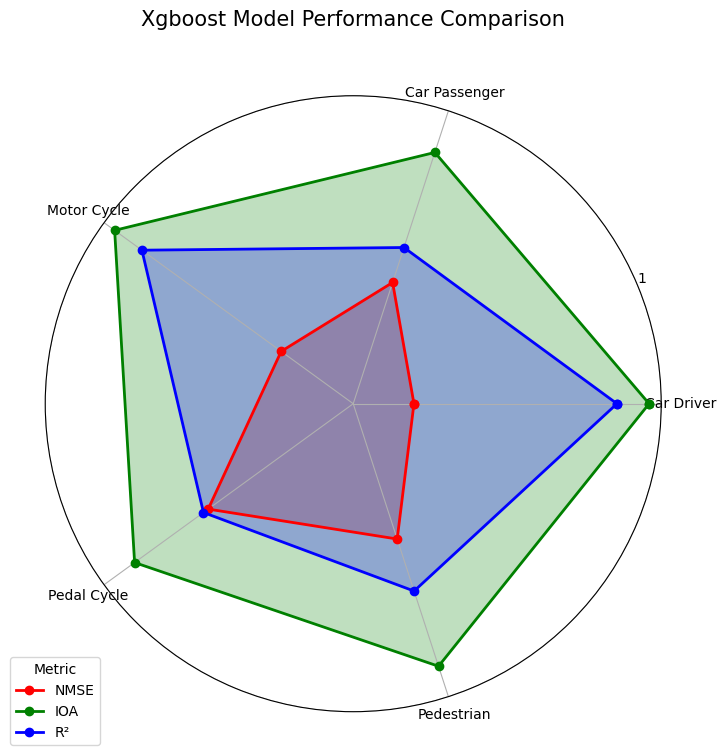

In [32]:
import matplotlib.pyplot as plt
import numpy as np

nmse_values = [0.19719368671722654,
 0.4138414039397708,
 0.28909244720537913,
 0.5820672232504635,
 0.46194880603340005]


ioa_values = [0.9606470387852839,
 0.8578067143237443,
 0.9575401965978059,
 0.8773709103868865,
 0.8962552619051212]


r2_values =[0.8563462916573137,
 0.5332370224056182,
 0.8479688244390787,
 0.6009297412380068,
 0.6395994274301415]


labels = ['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian']

data = np.array([nmse_values, ioa_values, r2_values])

num_vars = data.shape[1]

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = ['red', 'green', 'blue']
labels_metric = ['NMSE', 'IOA', 'R²']

for idx, (data_slice, color, label) in enumerate(zip(data, colors, labels_metric)):
    if label == 'MAE':
        alpha_value = 0.5  
    else:
        alpha_value = 0.25 
    data_slice = np.concatenate([data_slice, [data_slice[0]]])  
    ax.plot(angles, data_slice, 'o-', linewidth=2, label=label, color=color)
    ax.fill(angles, data_slice, alpha=alpha_value, color=color)

ax.set_xticks(angles[:-1])  
ax.set_xticklabels(labels)
ax.set_yticks([1, 2, 3, 4, 5])  
ax.set_yticklabels(['1', '2', '3', '4', '5'])

plt.title('Xgboost Model Performance Comparison', size=15, color='black', y=1.1)
plt.legend(title='Metric', loc='upper right', bbox_to_anchor=(0.1, 0.1))
ax.set_ylim(0, 1)

plt.show()
